In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import pandas as pd

%matplotlib inline

In [2]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [3]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [19]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if (show_chart):
      fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
      ax1.pie(counts.values(), labels=hex_colors, colors=hex_colors)
      ax2.imshow(image)
      plt.subplots_adjust(wspace=0.3)
      plt.show()
        
    return rgb_colors

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


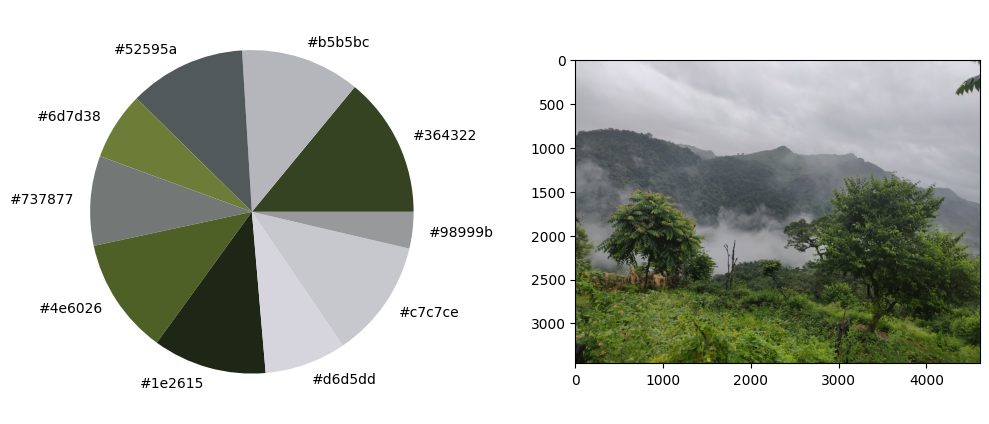

[array([54.74677793, 67.60093841, 34.13630694]),
 array([181.17485706, 181.72250868, 188.67999579]),
 array([82.71316861, 89.66196529, 90.91591088]),
 array([109.5776824 , 125.22268547,  56.04046597]),
 array([115.01835974, 120.14515377, 119.3916589 ]),
 array([78.4679225 , 96.23412271, 38.35540007]),
 array([30.36170836, 38.8183583 , 21.23629171]),
 array([214.50477455, 213.95705459, 221.66195169]),
 array([199.25326849, 199.18433943, 206.43429538]),
 array([152.09248036, 153.81964085, 155.89685746])]

In [20]:
get_colors(get_image('sample_image.jpg'), 10, True)